In [31]:
print("Aman Singh-20MAI0051")
print("GITHUB link--https://github.com/Aman9795/DL-assignment")

Aman Singh-20MAI0051
GITHUB link--https://github.com/Aman9795/DL-assignment


In [1]:
import tensorflow as tf
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import relu, softmax
from tensorflow.keras import regularizers
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.initializers import he_uniform, glorot_normal, zeros, ones
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [4]:
train = loadmat('C:/Users/user/Desktop/2nd sem program file/dataset/train_32x32.mat')
test = loadmat('C:/Users/user/Desktop/2nd sem program file/dataset/test_32x32.mat')

In [5]:
def show_images(n,image_array,label_array, cmap=None):
   
    total_rows = math.floor(n/4)+1
    random_list = random.sample(range(0, image_array.shape[0]), n)
    fig, axes = plt.subplots(total_rows, 4, figsize=(16, total_rows*4))
    [axi.set_axis_off() for axi in axes.ravel()] 
    r = 0
    c = 0
    for i in random_list:
        image = image_array[i,:,:,:]
        #axes[r, c].set_axis_off()
        axes[r, c].imshow(np.squeeze(image), cmap=cmap)
        axes[r, c].set_title(f"Label: {label_array[i]} \n {i}th image in the dataset.")
        c += 1
        if c % 4 == 0:
            r += 1
            c = 0
    plt.show()

In [6]:
def show_images_predictions(n,image_array,label_array1,label_array2, cmap=None):
    
    random_list = random.sample(range(0, image_array.shape[0]), n)
    fig, axes = plt.subplots(n, 2, figsize=(16, n*6))
    category_list1 = list(map(lambda x : x + 0.15, list(range(10)))) 
    category_list2 = list(map(lambda x : x - 0.15, list(range(10)))) 
    r = 0
    for i in random_list:
        image = image_array[i,:,:,:]
        axes[r, 0].set_axis_off()
        axes[r, 0].imshow(np.squeeze(image), cmap=cmap)
        #axes[r, 1].set_title(f"{i}th image in the dataset.")
        axes[r, 1].bar(category_list1,label_array1[i], width=0.3, label='MLP')
        axes[r, 1].bar(category_list2,label_array2[i], width=0.3, label='CNN')
        axes[r, 1].set_title(f"Prediction from MLP model: {np.argmax(label_array1[i,:])} \n Prediction from CNN model: {np.argmax(label_array2[i,:])} ")
        axes[r, 1].legend()
        r += 1
    plt.show()

In [7]:
def plot_acc(history):
    try:
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
    except KeyError:
        plt.plot(history.history['acc'])
        plt.plot(history.history['val_acc'])
    plt.title('Accuracy vs. epochs')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show() 


def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Loss vs. epochs')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.show()

In [8]:
train_images = train['X'] 
train_labels = train['y']
test_images = test['X'] 
test_labels = test['y']

train_images = train_images / 255.0
test_images = test_images / 255.0

train_images = np.moveaxis(train_images,-1,0)
test_images = np.moveaxis(test_images,-1,0)

train_labels[train_labels == 10] = 0
test_labels[test_labels == 10] = 0

In [9]:
train_images_grey = np.mean(train_images, axis=3)
train_images_grey = np.expand_dims(train_images_grey, axis=3) 
test_images_grey = np.mean(test_images, axis=3)
test_images_grey = np.expand_dims(test_images_grey, axis=3)

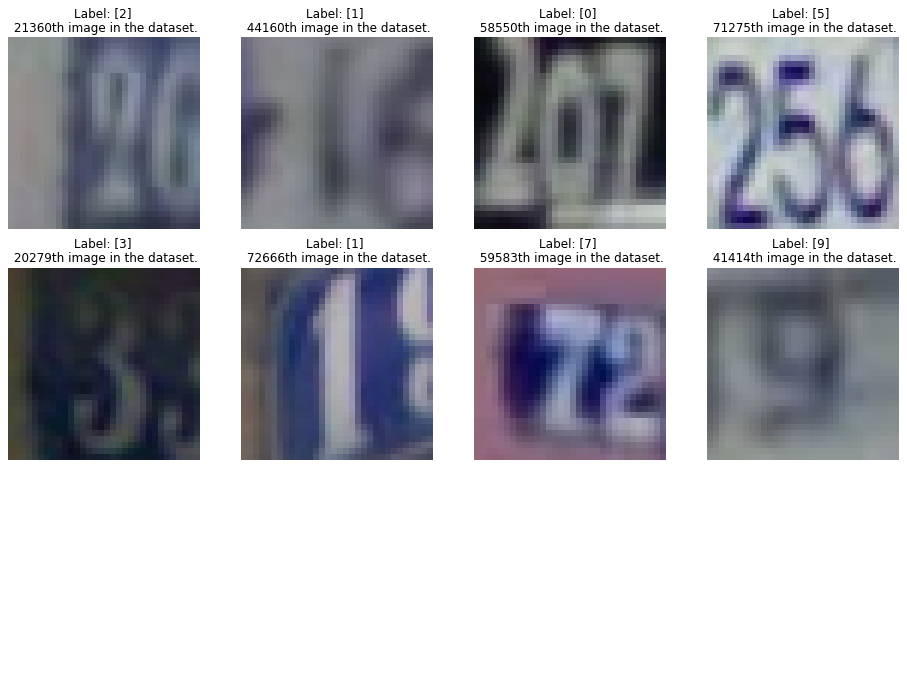

In [11]:
n = 8 
show_images(n,train_images,train_labels)


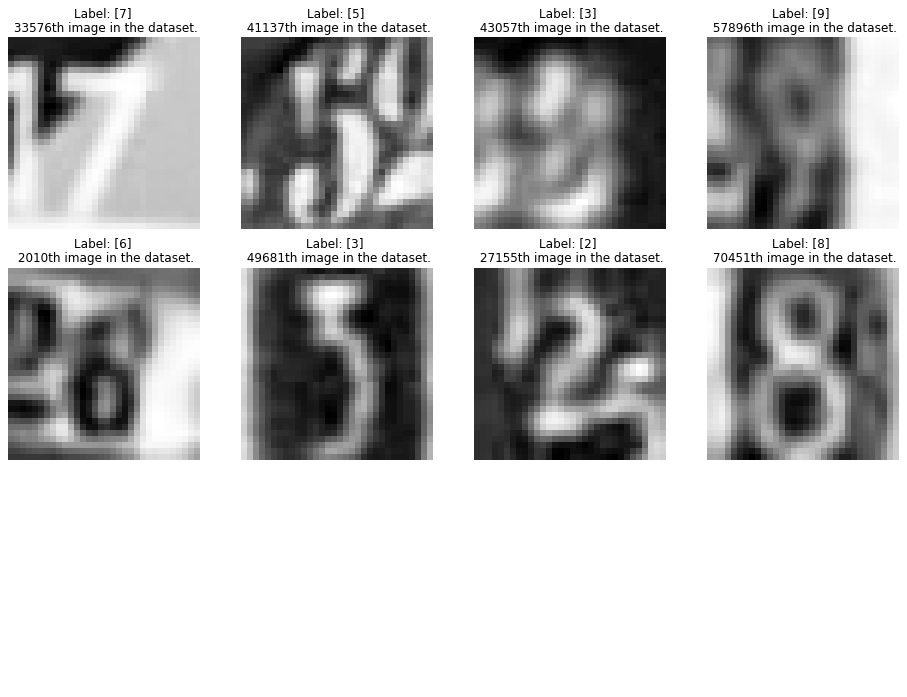

In [12]:
n = 8 
show_images(n,train_images_grey,train_labels, cmap='Greys')

In [13]:
def MLP_NN(input_shape, reg_rate):
    
    model = Sequential([
        Flatten(input_shape=input_shape),
        Dense(256, activation='relu', kernel_initializer="he_uniform", bias_initializer="ones",
              kernel_regularizer=regularizers.l2(reg_rate), name='dense_1_relu'),
        Dense(256, activation='relu', kernel_regularizer=regularizers.l2(reg_rate), name='dense_2_relu'),
        Dense(128, activation='relu', kernel_regularizer=regularizers.l2(reg_rate), name='dense_3_relu'),
        Dense(128, activation='relu', kernel_regularizer=regularizers.l2(reg_rate), name='dense_4_relu'),
        Dense(10, activation='softmax', name='dense_5_softmax')
    ])
    return model

In [14]:
def get_checkpoint_best_only(checkpoint_path):
    '''
    save best weights of the model with monitoring validation accuract
    '''
    checkpoint = ModelCheckpoint(checkpoint_path,
                                 save_weights_only=True,
                                 monitor='val_accuracy',
                                 verbose=1,
                                 save_best_only=True)
    
    return checkpoint

In [15]:
def get_test_accuracy(model, x_test, y_test):
    
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    print(' test accuracy: {acc:0.3f}'.format(acc=test_acc), '\n',
          'test loss: {loss:0.3f}'.format(loss=test_loss))

In [22]:
model_MLP = MLP_NN(input_shape=(32,32,1), reg_rate=1e-4)
model_MLP.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_1_relu (Dense)         (None, 256)               262400    
_________________________________________________________________
dense_2_relu (Dense)         (None, 256)               65792     
_________________________________________________________________
dense_3_relu (Dense)         (None, 128)               32896     
_________________________________________________________________
dense_4_relu (Dense)         (None, 128)               16512     
_________________________________________________________________
dense_5_softmax (Dense)      (None, 10)                1290      
Total params: 378,890
Trainable params: 378,890
Non-trainable params: 0
________________________________________________

In [23]:
model_MLP.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [24]:
checkpoint_best_only = get_checkpoint_best_only('E:/MLP_classifier/Trained models weights_English/checkpoints_best_only_MLP/checkpoint')

history_MLP = model_MLP.fit(train_images_grey,
                            train_labels,
                            batch_size=64,
                            epochs=30,
                            validation_split=0.10,
                            callbacks=[EarlyStopping(monitor='val_accuracy', patience=4), checkpoint_best_only]
                           )

Train on 65931 samples, validate on 7326 samples
Epoch 1/30
65931/65931 [==============================] - 7s 102us/sample - loss: 1.9648 - acc: 0.3189 - val_loss: 1.5138 - val_acc: 0.5064
Epoch 2/30
65931/65931 [==============================] - 5s 82us/sample - loss: 1.3670 - acc: 0.5567 - val_loss: 1.4326 - val_acc: 0.5239
Epoch 3/30
65931/65931 [==============================] - 6s 86us/sample - loss: 1.1747 - acc: 0.6342 - val_loss: 1.0523 - val_acc: 0.6769
Epoch 4/30
65931/65931 [==============================] - 5s 80us/sample - loss: 1.0684 - acc: 0.6738 - val_loss: 1.0070 - val_acc: 0.6940
Epoch 5/30
65931/65931 [==============================] - 5s 75us/sample - loss: 0.9915 - acc: 0.6997 - val_loss: 0.9696 - val_acc: 0.7007
Epoch 6/30
65931/65931 [==============================] - 5s 76us/sample - loss: 0.9385 - acc: 0.7191 - val_loss: 0.9592 - val_acc: 0.7011
Epoch 7/30
65931/65931 [==============================] - 5s 79us/sample - loss: 0.8929 - acc: 0.7347 - val_loss: 0.

65931/65931 [==============================] - 5s 73us/sample - loss: 0.6919 - acc: 0.8042 - val_loss: 0.7112 - val_acc: 0.8033
Epoch 20/30
65931/65931 [==============================] - 5s 78us/sample - loss: 0.6803 - acc: 0.8092 - val_loss: 0.7227 - val_acc: 0.8028
Epoch 21/30
65931/65931 [==============================] - 5s 77us/sample - loss: 0.6770 - acc: 0.8102 - val_loss: 0.8005 - val_acc: 0.7690
Epoch 22/30
65931/65931 [==============================] - 5s 79us/sample - loss: 0.6667 - acc: 0.8157 - val_loss: 0.7014 - val_acc: 0.8056
Epoch 23/30
65931/65931 [==============================] - 5s 77us/sample - loss: 0.6525 - acc: 0.8188 - val_loss: 0.7270 - val_acc: 0.7981
Epoch 24/30
65931/65931 [==============================] - 5s 80us/sample - loss: 0.6491 - acc: 0.8204 - val_loss: 0.7105 - val_acc: 0.8036
Epoch 25/30
65931/65931 [==============================] - 5s 79us/sample - loss: 0.6476 - acc: 0.8219 - val_loss: 0.7952 - val_acc: 0.7755
Epoch 26/30
65931/65931 [=======

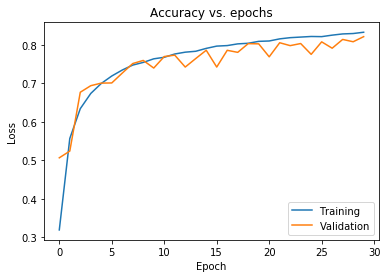

In [25]:
plot_acc(history_MLP)

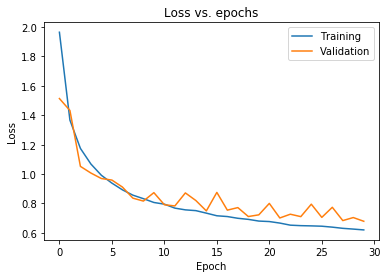

In [26]:
plot_loss(history_MLP)

In [27]:
get_test_accuracy(model_MLP, test_images_grey, test_labels)

 test accuracy: 0.794 
 test loss: 0.787


In [28]:
def get_model_best_epoch(model, checkpoint_path):
    '''
    get model saved best epoch
    '''
    model.load_weights(checkpoint_path)
    
    return model

In [29]:
prediction_MLP = model_MLP.predict(test_images_grey)
prediction_MLP_final = np.argmax(prediction_MLP, axis=1)
prediction_MLP_final = np.expand_dims(prediction_MLP_final, axis=1)

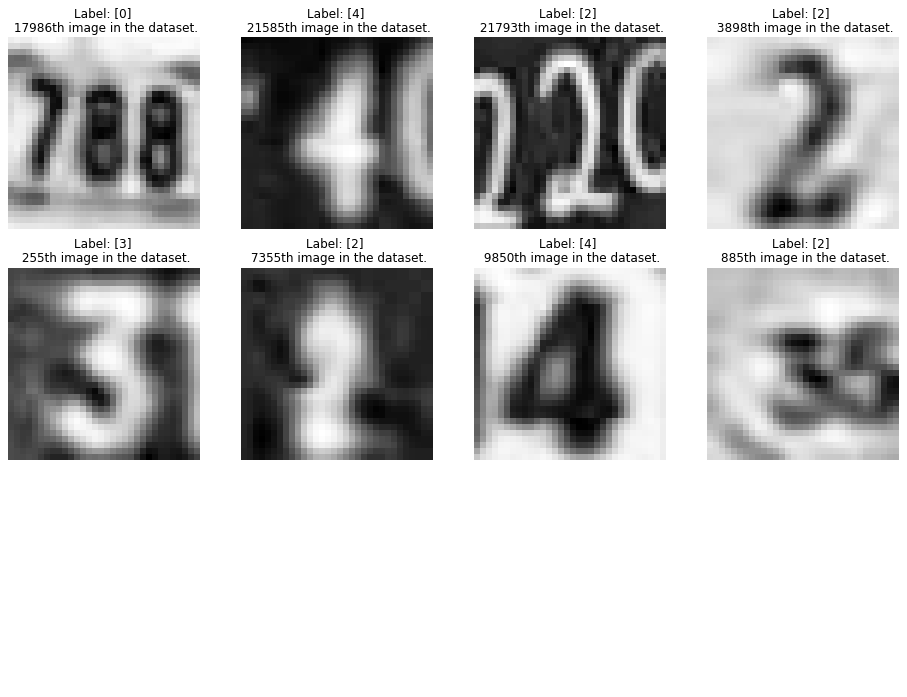

In [30]:
n = 8 
show_images(n,test_images_grey,prediction_MLP_final, cmap='Greys')